In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

## Functions

In [8]:
def prepare_plot_percentage_epoch(history, model_name):

    n_epochs = len(history['loss'])
    model_name = [model_name]*n_epochs
    best_loss_val = min(history['val_loss'])
    index_best_loss_val = history['val_loss'].index(best_loss_val)

    fraction_epoch = [i/index_best_loss_val for i in range(1, n_epochs+1)]
    log_fraction_epoch = np.log(fraction_epoch)
    loss_train = history['loss']
    loss_val = history['val_loss']
    
    return pd.DataFrame(data={'name_model': model_name,
                              'fraction_best_epochs': fraction_epoch,
                              'log_fraction_best_epochs': log_fraction_epoch,
                              'loss_train': loss_train,
                              'loss_val': loss_val})

## Plot results of training

In [38]:
history_gd = pickle.load(open('../data/models/trainHistory_model_gd.p', 'rb'))

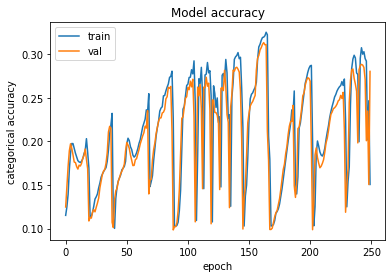

In [39]:
plt.plot(history_gd['categorical_accuracy'])
plt.plot(history_gd['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

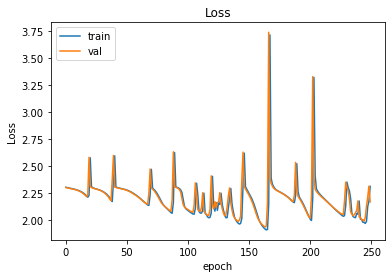

In [40]:
plt.plot(history_gd['loss'])
plt.plot(history_gd['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
df_results_gd = prepare_plot_percentage_epoch(history_gd, model_name='cat_cnn_gd')
df_results_gd.head(2)

,name_model,fraction_best_epochs,log_fraction_best_epochs,loss_train,loss_val
0,cat_cnn_gd,0.006135,-5.093750,2.300851,2.298410
1,cat_cnn_gd,0.012270,-4.400603,2.297912,2.295974


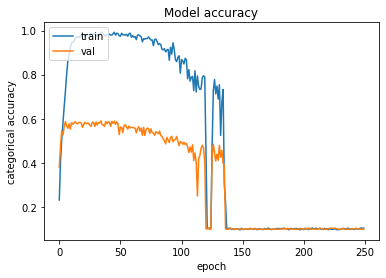

In [48]:
history_sgd_perc_04 = pickle.load(open('../data/models/trainHistory_model_sgd_perc_04.p', 'rb'))
plt.plot(history_sgd_perc_04['categorical_accuracy'])
plt.plot(history_sgd_perc_04['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

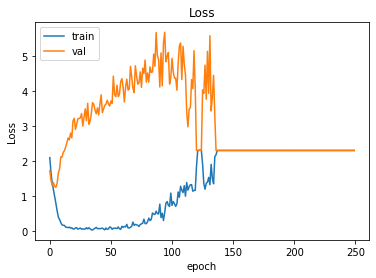

In [49]:
plt.plot(history_sgd_perc_04['loss'])
plt.plot(history_sgd_perc_04['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

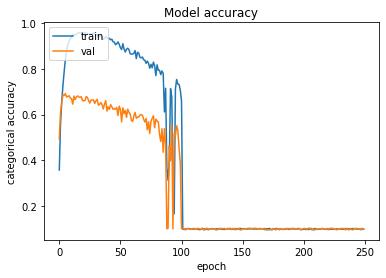

In [42]:
history_sgd = pickle.load(open('../data/models/trainHistory_model_sgd.p', 'rb'))
plt.plot(history_sgd['categorical_accuracy'])
plt.plot(history_sgd['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

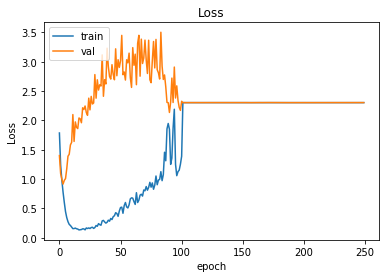

In [43]:
plt.plot(history_sgd['loss'])
plt.plot(history_sgd['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
df_results_sgd = prepare_plot_percentage_epoch(history_sgd, model_name='cat_cnn_sgd')
df_results_sgd.head(2)

,name_model,fraction_best_epochs,log_fraction_best_epochs,loss_train,loss_val
0,cat_cnn_sgd,0.333333,-1.098612,1.785478,1.400179
1,cat_cnn_sgd,0.666667,-0.405465,1.239857,1.093664


In [45]:
df_to_plot = pd.concat([df_results, df_results_sgd])

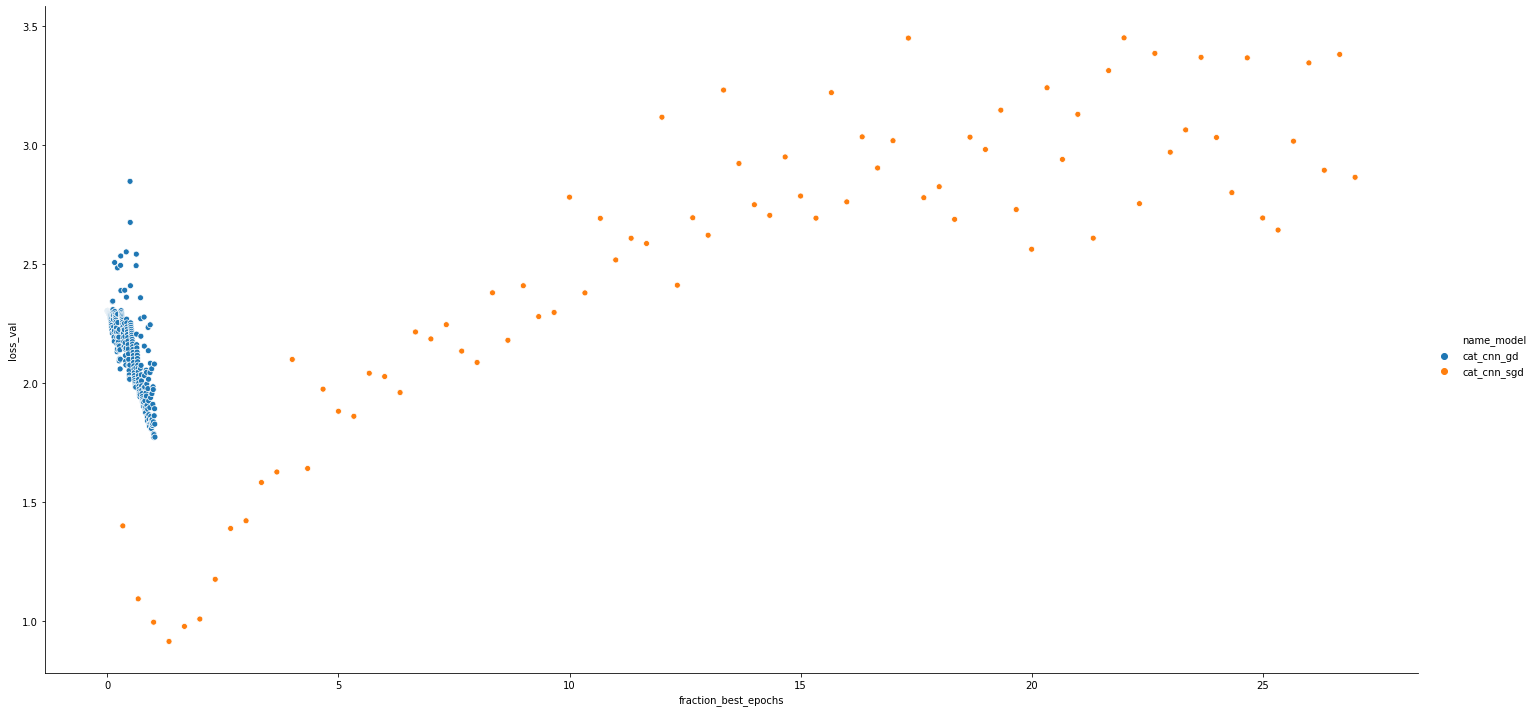

In [46]:
# Plot the results
sns.relplot(x='fraction_best_epochs', y='loss_val', hue='name_model',
            data=df_to_plot[df_to_plot['fraction_best_epochs'] <= 27], height=10, aspect=2.)

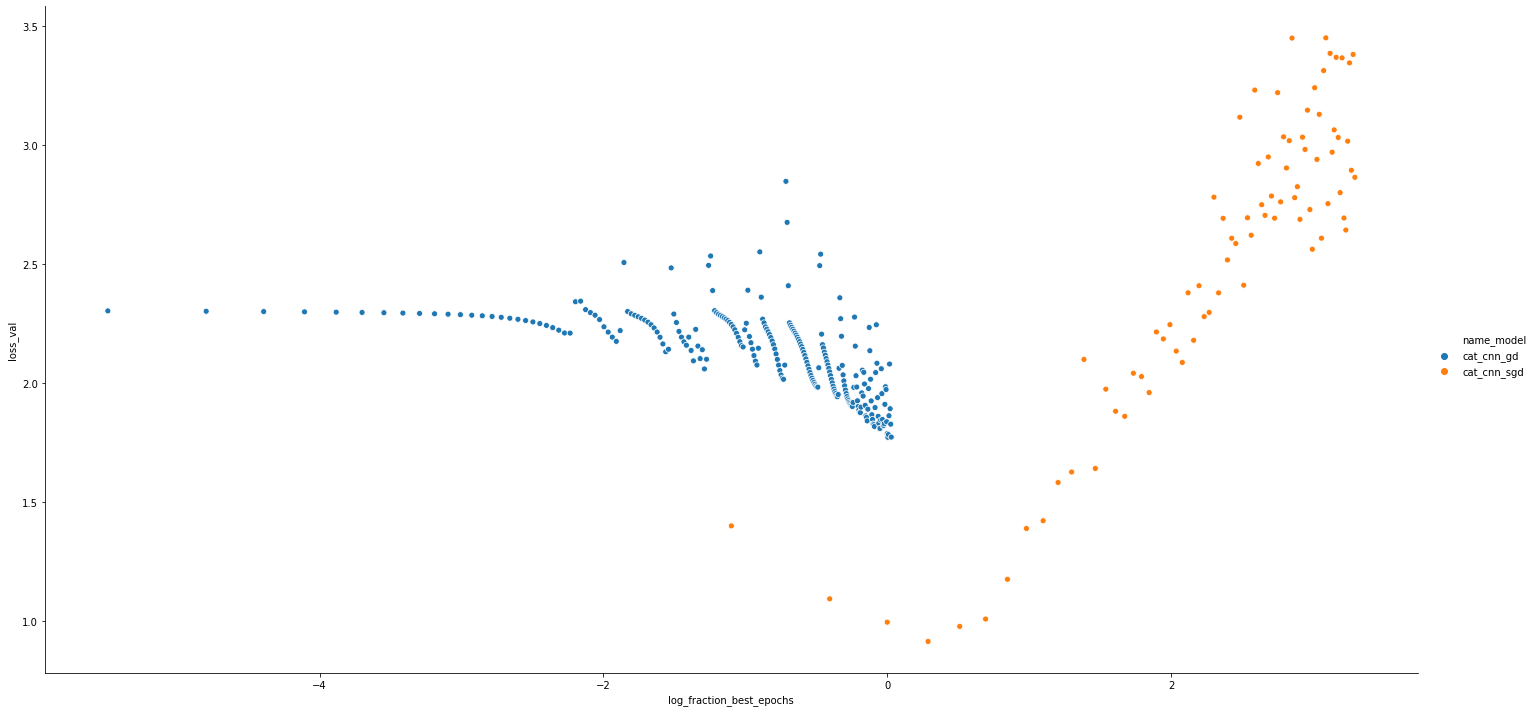

In [47]:
sns.relplot(x='log_fraction_best_epochs', y='loss_val', hue='name_model',
            data=df_to_plot[df_to_plot['fraction_best_epochs'] <= 27], height=10, aspect=2.)

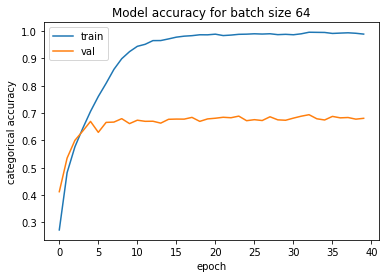

In [23]:
history_sgd_ba_64 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_64.p', 'rb'))
plt.plot(history_sgd_ba_64['categorical_accuracy'])
plt.plot(history_sgd_ba_64['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 64')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

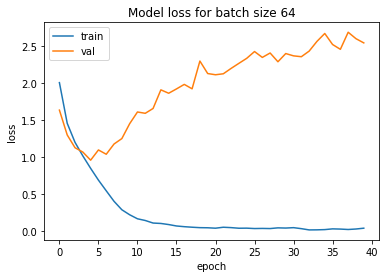

In [24]:
plt.plot(history_sgd_ba_64['loss'])
plt.plot(history_sgd_ba_64['val_loss'])
plt.title('Model loss for batch size 64')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

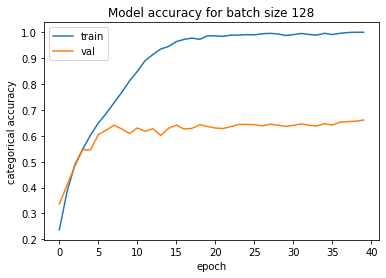

In [25]:
history_sgd_ba_128 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_128.p', 'rb'))
plt.plot(history_sgd_ba_128['categorical_accuracy'])
plt.plot(history_sgd_ba_128['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 128')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

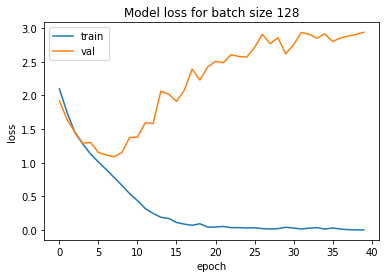

In [26]:
plt.plot(history_sgd_ba_128['loss'])
plt.plot(history_sgd_ba_128['val_loss'])
plt.title('Model loss for batch size 128')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

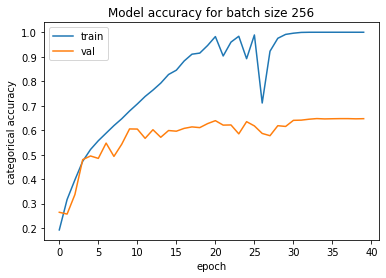

In [28]:
history_sgd_ba_256 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_256.p', 'rb'))
plt.plot(history_sgd_ba_256['categorical_accuracy'])
plt.plot(history_sgd_ba_256['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 256')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

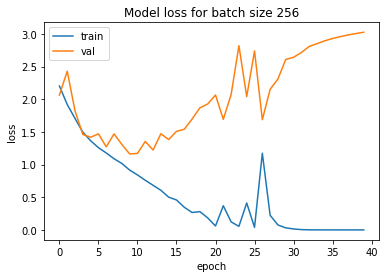

In [29]:
plt.plot(history_sgd_ba_256['loss'])
plt.plot(history_sgd_ba_256['val_loss'])
plt.title('Model loss for batch size 256')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

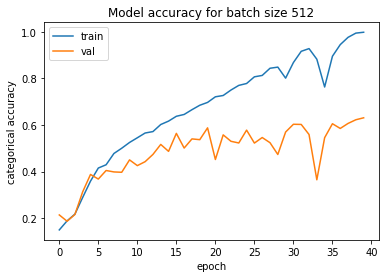

In [30]:
history_sgd_ba_512 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_512.p', 'rb'))
plt.plot(history_sgd_ba_512['categorical_accuracy'])
plt.plot(history_sgd_ba_512['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 512')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

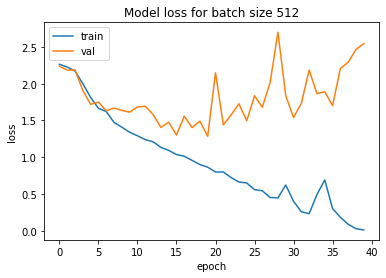

In [32]:
plt.plot(history_sgd_ba_512['loss'])
plt.plot(history_sgd_ba_512['val_loss'])
plt.title('Model loss for batch size 512')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

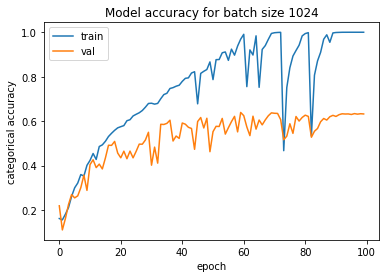

In [36]:
history_sgd_ba_1024 = pickle.load(open('../data/models/trainHistory_model_sgd_ba_1024.p', 'rb'))
plt.plot(history_sgd_ba_1024['categorical_accuracy'])
plt.plot(history_sgd_ba_1024['val_categorical_accuracy'])
plt.title('Model accuracy for batch size 1024')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

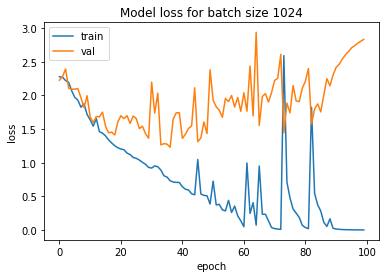

In [37]:
plt.plot(history_sgd_ba_1024['loss'])
plt.plot(history_sgd_ba_1024['val_loss'])
plt.title('Model loss for batch size 1024')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()